ERROR: Could not find a version that satisfies the requirement quand1 (from versions: none)
ERROR: No matching distribution found for quand1


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor


Quandl is a website manily used to find the historical data of stocks mainly the TATAGLOBAL stock


In [30]:
data =pd.read_csv('/content/NSE_tataglobal/NSE-TATAGLOBAL.csv')
data.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


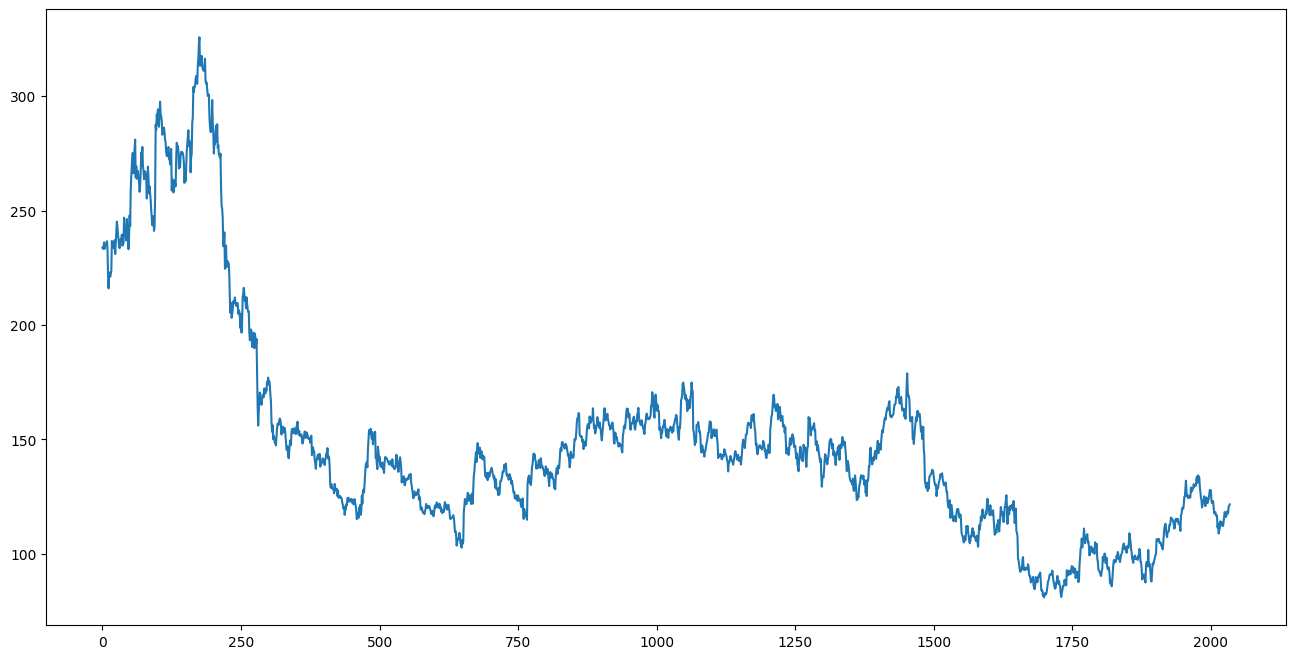

In [33]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Closing Price')


**Classification Problem: Buy (+1) or sell (-1) the stock**

In [36]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()


Input feature selection to predict whether customer should buy or sell the stock

In [55]:
X= data [['Open - Close','High - Low' ]]
X.head()


,Open - Close,High - Low
0,0.30,5.75
1,1.30,5.70
2,5.75,7.50
3,-2.80,4.75
4,0.25,8.45


Intention is to store +1 for the buy signal and -1 for the sell signal. The target variable is "Y" for classfication task

In [44]:
Y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)
Y


array([-1,  1,  1, ...,  1,  1, -1])

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=44)

**Implementation of KNN Classifier**

In [ ]:
actual_predicted_data = pd.DataFrame({'Actual Class': Y_test, 'Predicted Class':prediction_classification})

In [51]:
# using gridesearch to find the best parameter
params= {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn,params, cv=5)

#fit the model
model.fit(X_train, Y_train)

#Accuracy Score
accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)


Train_data Accuracy: 0.87
Test_data Accuracy: 0.88


In [54]:
predictions_classification = model.predict(X_test)
actual_predicted_data = pd.DataFrame({'Actual Class': Y_test, 'Predicted Class': predictions_classification})
actual_predicted_data.head()


,Actual Class,Predicted Class
0,1,1
1,1,1
2,1,1
3,1,1
4,1,-1


**Implementation of KNN Regressor**

In [63]:
## Change value of X
Yreg = data['Close']

X_trainreg, X_testreg, Y_trainreg, Y_testreg = train_test_split(X, Yreg, test_size=0.25, random_state=44)

# using gridesearch to find the best parameter
params= {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg,params, cv=5)

#fit the model
model_reg.fit(X_trainreg, Y_trainreg)
predictions = model_reg.predict(X_testreg)

print(predictions)


[182.19666667 127.13333333 180.85666667 161.57       155.71333333
 135.41       146.22       138.02       155.64333333 127.39666667
 146.83       164.82666667 144.86666667 233.50666667 149.73333333
 127.77666667 131.64333333 140.21333333 135.69333333 135.60333333
 186.15333333 114.32666667 152.01       129.66666667 145.46
 137.10333333 143.59       120.25       135.32333333 138.14
 165.04666667 144.13       127.1        186.16333333 188.36333333
 133.31       135.88333333 128.05666667 142.43333333 132.00666667
 150.21       141.32333333 128.48       116.1        135.78
 139.59333333 220.78666667 158.87       146.65333333 118.07333333
 123.11       113.48       132.33333333 187.89333333 169.50666667
 126.81       202.99       224.11666667 115.76333333 149.16
 127.68       176.64333333 137.51       178.32       114.17666667
 160.47666667 129.88333333 128.12333333 149.08333333 133.87
 135.72333333 122.13333333 132.96333333 216.55666667 185.29
 156.26333333 129.31666667 137.71666667 139.4 

In [65]:
# rmse
rms = np.sqrt(np.mean(np.power((np.array(Y_test) - np.array(predictions)),2)))
rms

153.06074556273416

In [67]:
valid = pd.DataFrame({'Actual Close': Y_testreg, 'Predicted Close Value': predictions})
valid.head()

,Actual Close,Predicted Close Value
1091,149.45,182.196667
785,137.45,127.133333
1435,169.80,180.856667
878,154.85,161.570000
742,126.60,155.713333
